<a href="https://colab.research.google.com/github/dp1706/Machine-Learning/blob/master/Assignment%207/ML_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                    ***Assignment 7***

 * __About ELBOW METHOD__:

 A common heuristic to choose the number of clusters or the value of k.
Using the "elbow" or "knee of a curve" as a cutoff point, we choose a point where diminishing returns are no longer worth the additional cost.

* __SSE( Sum of Squared)__:


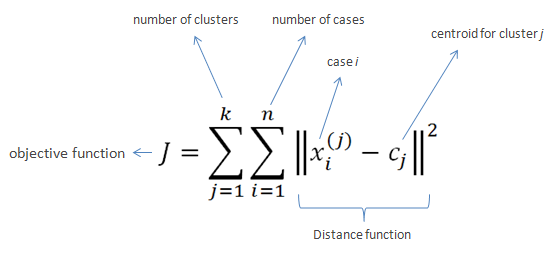

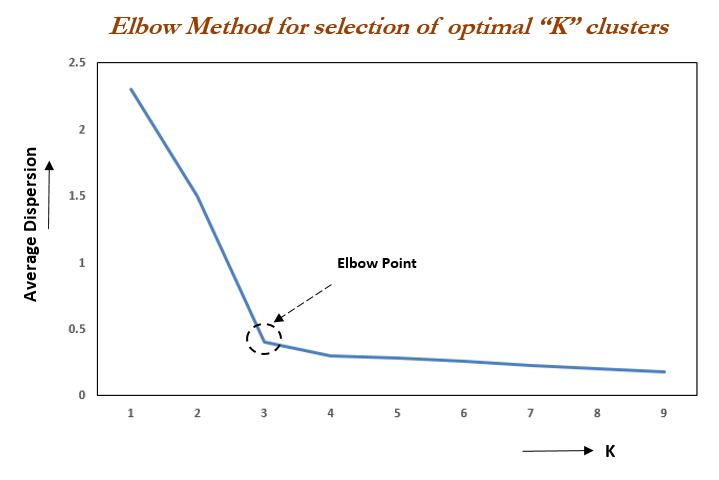

__ALGORITHM__:

1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters

2. For each k, calculate the SSE
Plot the curve of SSE according to the number of clusters k.

3. The location of a bend (knee) in the plot is generally considered as an indicator of the optimal value of k.

4. The location of a bend (knee) in the plot is generally considered as an indicator of the optimal value of k.

## MODULES

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy
warnings.filterwarnings('ignore') 

## Data Visualization and Preprocessing

In [2]:
dataset = load_iris()
dataset.filename

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv'

In [3]:
X = pd.DataFrame(dataset.data,columns=dataset.feature_names)
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
Y = pd.DataFrame(dataset.target,columns=['Class'])
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


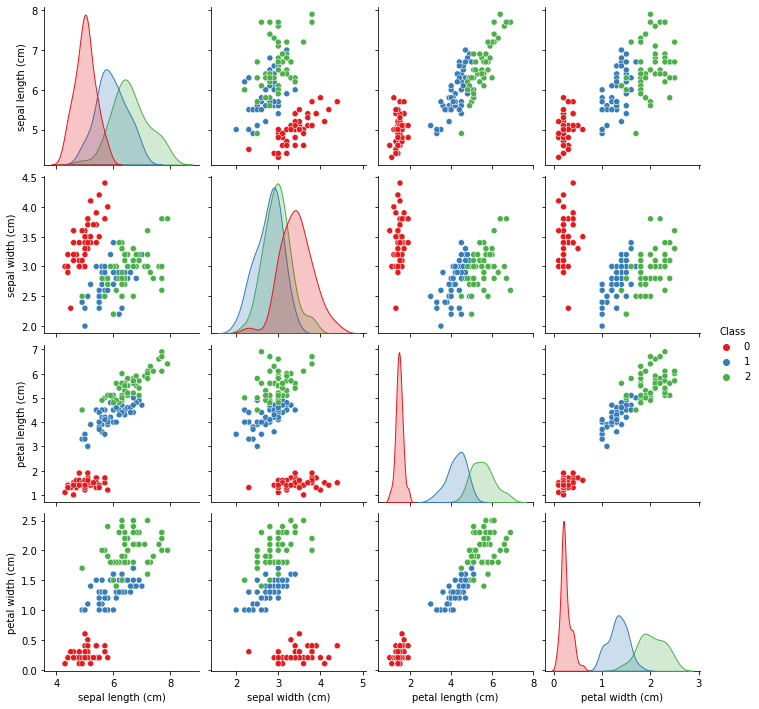

In [5]:
sns.pairplot(data=X.join(Y),hue='Class',palette='Set1')
plt.show()

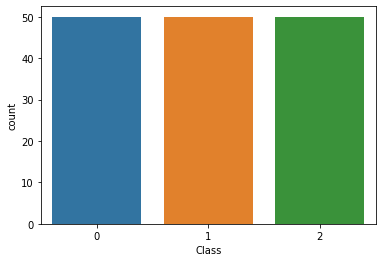

In [6]:
sns.countplot(data=X.join(Y),x='Class')
plt.show()

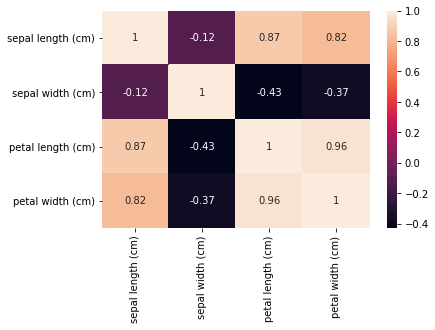

In [7]:
sns.heatmap(data=X.corr(),annot=True,linecolor='red')
plt.show()

In [8]:
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns=dataset.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## K-Means Algorithm From Scratch

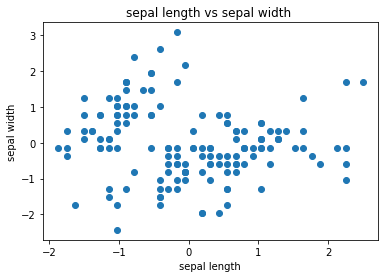

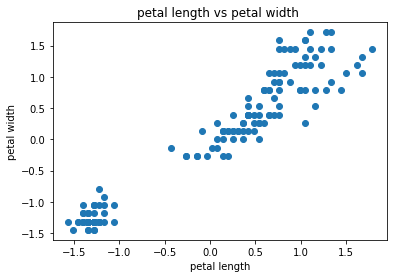

In [366]:
#==========================================================
#================== ACTUAL DATA ===========================
#==========================================================

#sepal length vs sepal width
plt.scatter(X.iloc[:,0:1],X.iloc[:,1:2])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("sepal length vs sepal width ")
plt.show()

#petal width vs petal length
plt.scatter(X.iloc[:,2:3],X.iloc[:,3:4])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("petal length vs petal width ")
plt.show()

In [367]:
def calculate_SSE(X,centers):
  return sum(np.min(cdist(X, centers, 'euclidean'),axis=1))

In [368]:
def K_Means(x,k):

  n = x.shape[0]

  c = x.shape[1]

  #std = np.std(x, axis = 0)
  #centers = np.random.randn(k,c)*std

  centers = np.zeros((k,c))
  #index = np.random.randint(0,n,k)
  for i in range(k):
    centers[i] = x[i+3]

  centers_old = np.zeros(centers.shape) 
  centers_new = deepcopy(centers)

  clusters = np.zeros(n)
  distances = np.zeros((n,k))

  #error = np.linalg.norm(centers_new - centers_old)
  error = np.sum((centers_new - centers_old)/centers_old * 100.0)
  while error > 0.1:
  #while iter:  
    
    
    for i in range(k):
        distances[:,i] = np.linalg.norm(x - centers_new[i], axis=1)
    
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)

    
    for i in range(k):
        centers_new[i] = np.mean(x[clusters == i], axis=0)

    #error = np.linalg.norm(centers_new - centers_old)
    error = np.sum((centers_new - centers_old)/centers_old * 100.0)
    #iter -= 1
  return centers_new

In [369]:
def predict(x,centroids):
  
  Y_pred = []
  for i in x:
    dist = [np.linalg.norm(i-centroid) for centroid in centroids]
    min_dist = np.argmin(dist)
    Y_pred.append(min_dist)
  return Y_pred 

Clustering Plot for k = 1 :  


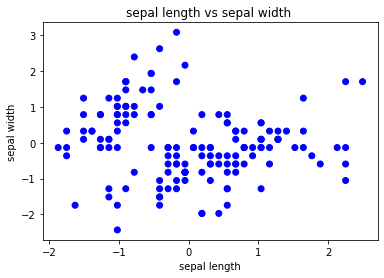

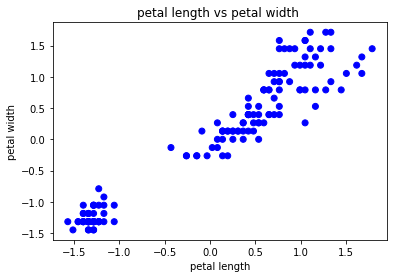

Clustering Plot for k = 2 :  


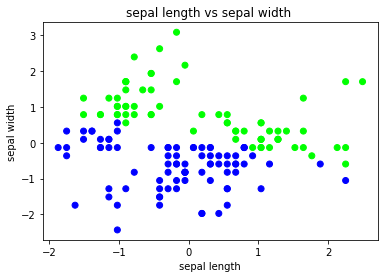

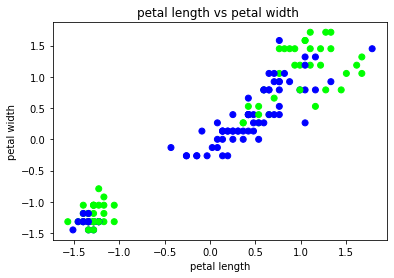

Clustering Plot for k = 3 :  


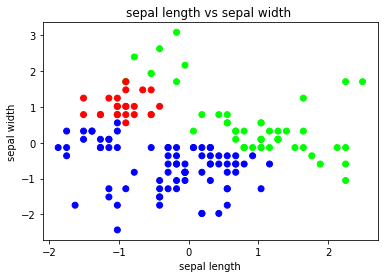

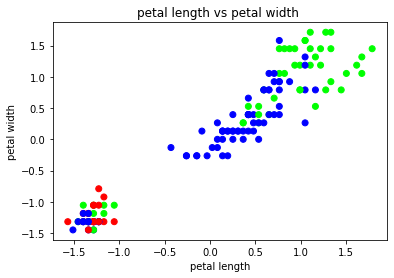

Clustering Plot for k = 4 :  


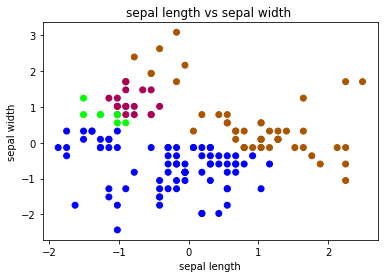

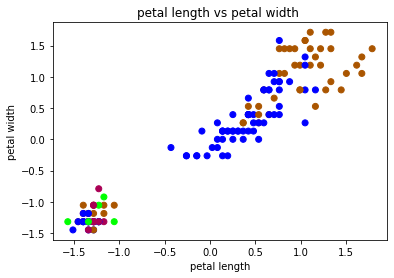

Clustering Plot for k = 5 :  


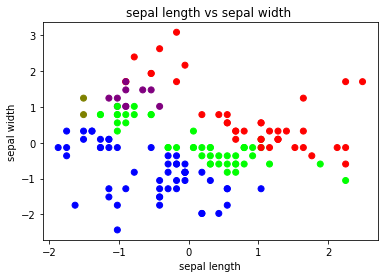

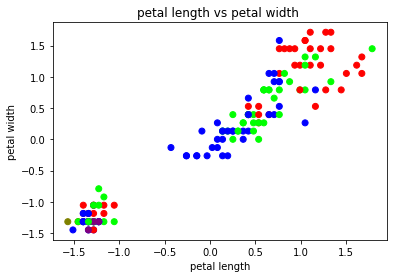

Clustering Plot for k = 6 :  


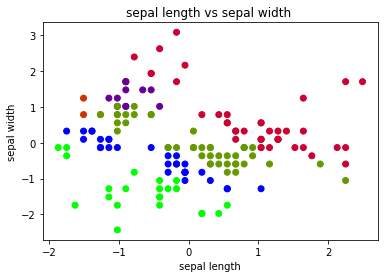

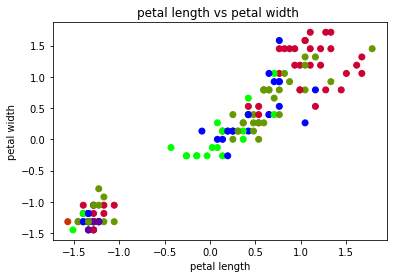

Clustering Plot for k = 7 :  


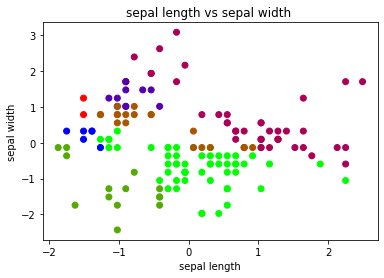

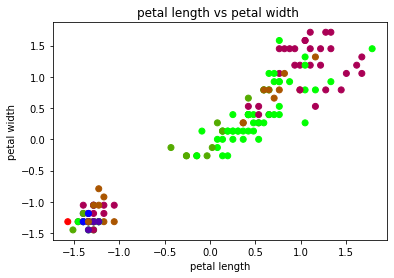

Clustering Plot for k = 8 :  


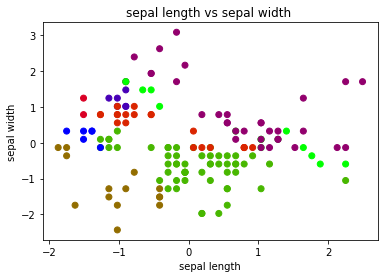

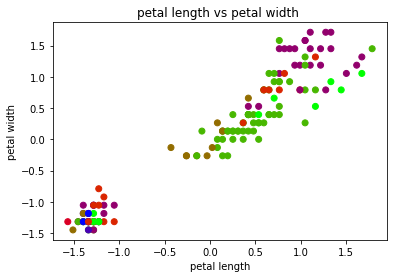

Clustering Plot for k = 9 :  


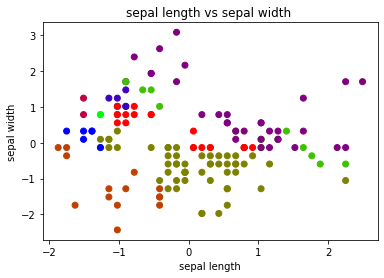

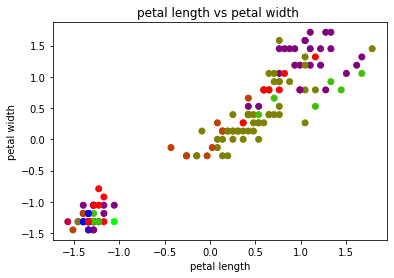

Clustering Plot for k = 10 :  


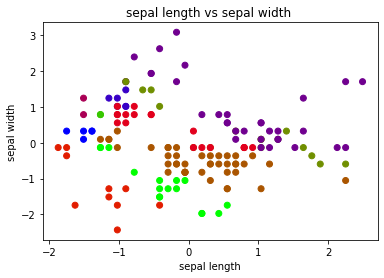

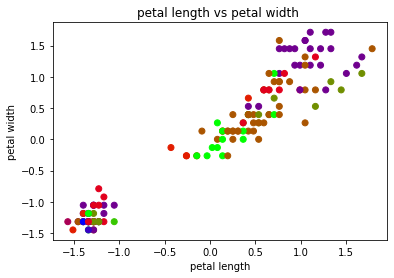

In [370]:
K = range(1,11)
SSE_value =  []

for k in K:
  centroids = K_Means(X.to_numpy(),k)
  predict_value = predict(X.to_numpy(),centroids)
  l = calculate_SSE(X.to_numpy(),centroids)
  SSE_value.append(l)

  #print(centroids)
  #accuracy = accuracy_score(Y.to_numpy(),predict_value)
  #print("Accuracy for k = {} is : {} ".format(k,accuracy * 100))
  print("===============================================================")
  print("Clustering Plot for k = {} :  ".format(k))
  print("===============================================================")

  #sepal length vs sepal width
  plt.scatter(X.iloc[:,0:1],X.iloc[:,1:2],c=predict_value,cmap='brg')
  plt.xlabel("sepal length")
  plt.ylabel("sepal width")
  plt.title("sepal length vs sepal width ")
  plt.show()

  #petal width vs petal length
  plt.scatter(X.iloc[:,2:3],X.iloc[:,3:4],c=predict_value,cmap='brg')
  plt.xlabel("petal length")
  plt.ylabel("petal width")
  plt.title("petal length vs petal width ")
  plt.show()

## K-Means Algorithms From Scikit-Learn

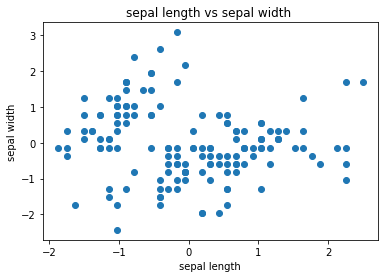

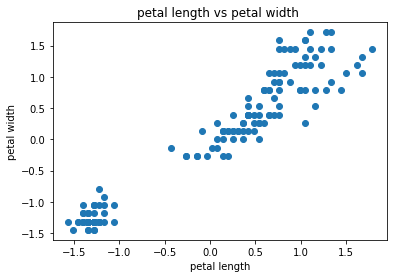

In [104]:
#==========================================================
#================== ACTUAL DATA ===========================
#==========================================================

#sepal length vs sepal width
plt.scatter(X.iloc[:,0:1],X.iloc[:,1:2])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("sepal length vs sepal width ")
plt.show()

#petal width vs petal length
plt.scatter(X.iloc[:,2:3],X.iloc[:,3:4])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("petal length vs petal width ")
plt.show()

In [105]:
# Implementing K-Means Algorithm

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

Clustering Plot for k = 1 :  


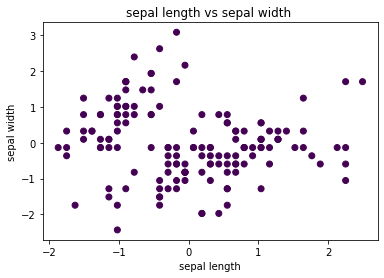

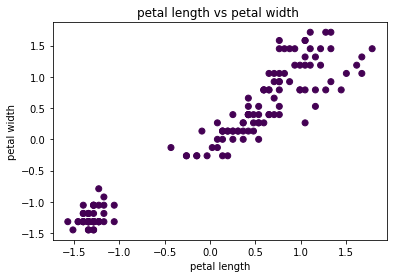

Clustering Plot for k = 2 :  


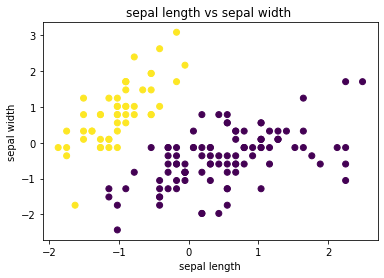

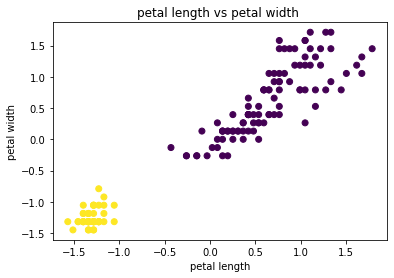

Clustering Plot for k = 3 :  


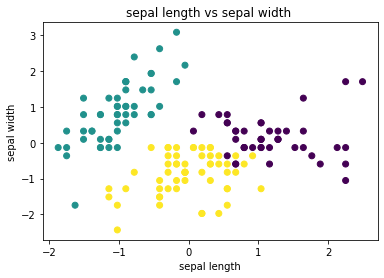

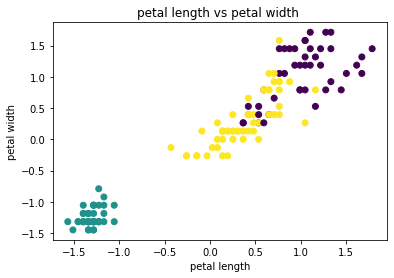

Clustering Plot for k = 4 :  


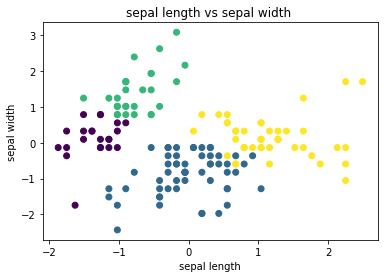

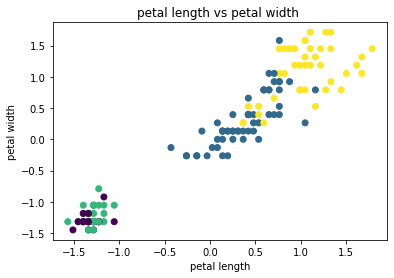

Clustering Plot for k = 5 :  


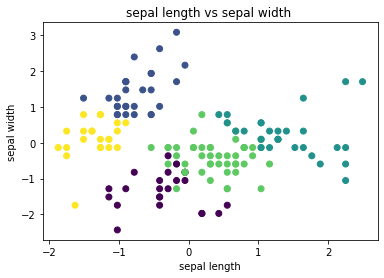

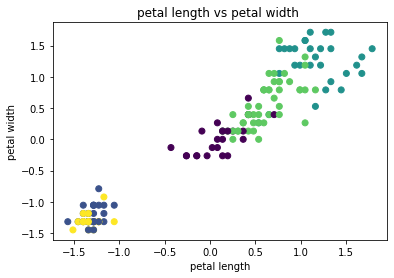

Clustering Plot for k = 6 :  


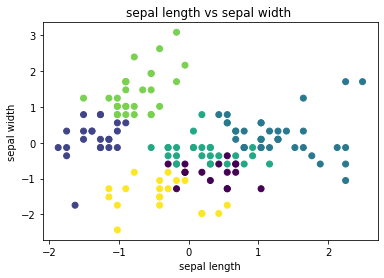

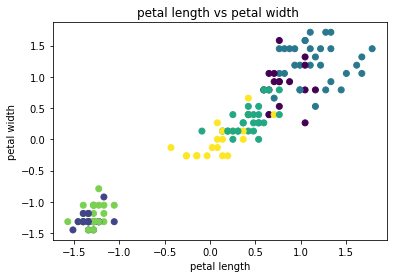

Clustering Plot for k = 7 :  


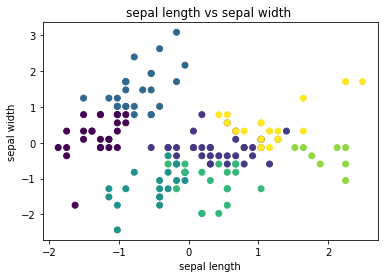

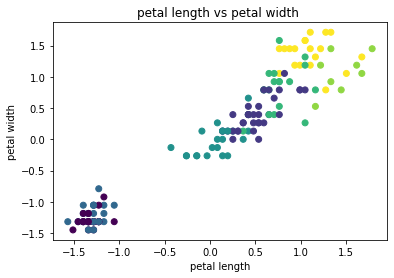

Clustering Plot for k = 8 :  


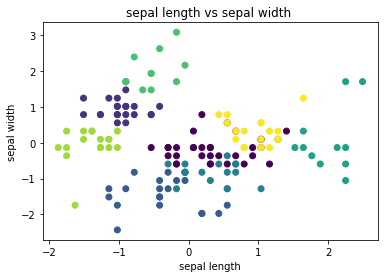

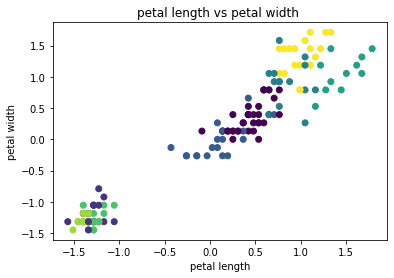

Clustering Plot for k = 9 :  


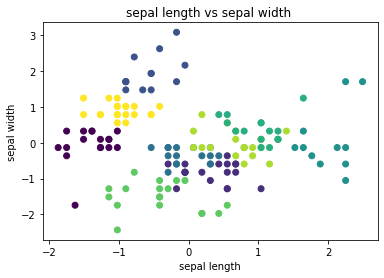

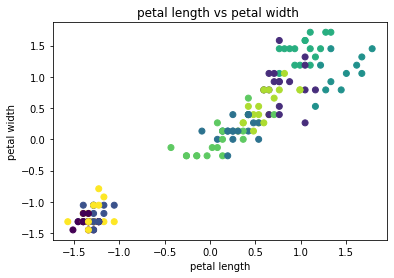

Clustering Plot for k = 10 :  


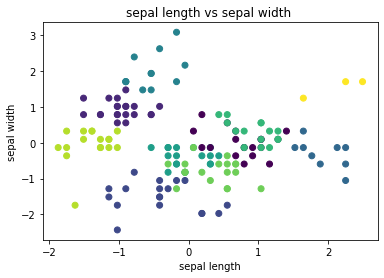

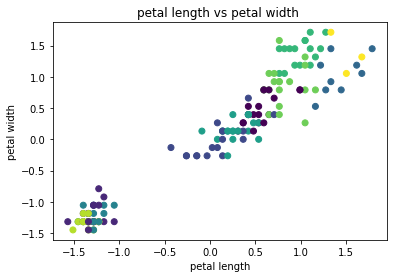

In [106]:
K2 = range(1,11)

inertia = []
distortion = []

for k2 in K2:

  model = KMeans(n_clusters=k2)
  model.fit(X)
  model.predict(X)
  pred =model.labels_
  inertia.append(model.inertia_)
  distortion.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])
  print("===============================================================")
  print("Clustering Plot for k = {} :  ".format(k2))
  print("===============================================================")

  #sepal length vs sepal width
  #fig, (ax1,ax2) = plt.subplots(1,2)
  plt.scatter(X.iloc[:,0:1],X.iloc[:,1:2],c=pred)
  plt.xlabel("sepal length")
  plt.ylabel("sepal width")
  plt.title("sepal length vs sepal width ")
  plt.show()

  #petal width vs petal length
  plt.scatter(X.iloc[:,2:3],X.iloc[:,3:4],c=pred)
  plt.xlabel("petal length")
  plt.ylabel("petal width")
  plt.title("petal length vs petal width ")
  plt.show()



## Comparison of Both Elbow Curves

* __Scratch Elbow Method Curve__

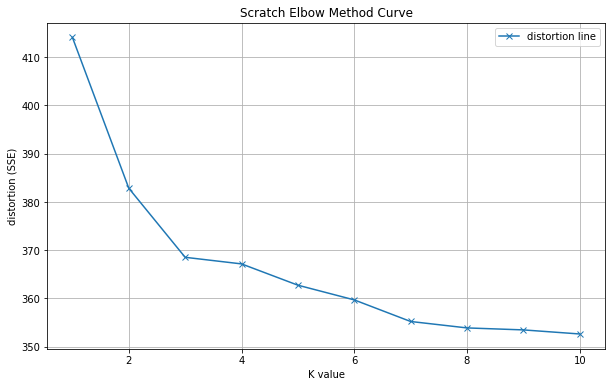

In [371]:
# Finding best K Value using Elbow method

fig = plt.figure(figsize=(10,6))
plt.plot(K,SSE_value,'x-',label='distortion line')
plt.title("Scratch Elbow Method Curve")
plt.xlabel("K value")
plt.ylabel("distortion (SSE)")
plt.legend()
plt.grid()

_Note :_ __Best K value From the Graph is : k=3__

* __Scikit-Learn Elbow Method Curve__

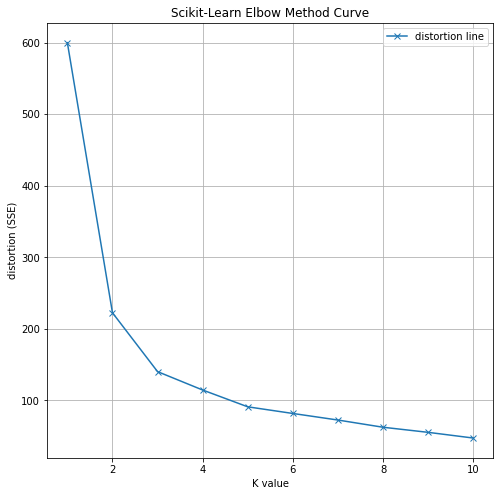

In [358]:
#Elbow Method

fig = plt.figure(figsize=(8,8))
plt.plot(K2,inertia,'x-',label="distortion line")
plt.title("Scikit-Learn Elbow Method Curve")
plt.xlabel("K value")
plt.ylabel("distortion (SSE)")
plt.legend()
plt.grid()

_Note :_ __Best K value From the Graph is : k=3__